In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob

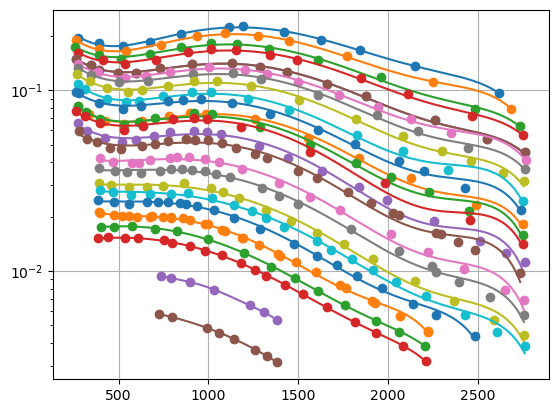

In [2]:
fig,ax = plt.subplots()
#def eps_CO2(pL,T):

lista_curva_01 = np.sort(glob.glob('hottel_sarofim/hottel_CO2_*.csv'))

values_pL = np.array([1.5,1,0.5,0.45,0.30,0.25,0.20,0.15,0.10,0.06,0.045,0.03,0.025,0.02,
                     0.013,0.01,0.006,0.0045,0.003,0.0025,0.002,0.0015,0.0012,0.001,0.0006,0.00035])
for i,filei in enumerate(lista_curva_01):
    A1 = pd.read_csv(filei,header=None)
    n_index = A1[0].argsort()
    A1.iloc[:,0] = A1.iloc[:,0][n_index]
    A1.iloc[:,1] = A1.iloc[:,1][n_index]
    x1,y1 = A1.iloc[:,:2].to_numpy().T
    x1s = np.linspace(x1[0],x1[-1],200)
    idp1 = np.polyfit(x1,y1,5)
    p1 = np.poly1d(idp1)
    lin, = ax.plot(x1,y1,'o')
    ax.semilogy(x1s,p1(x1s),color=lin.get_color())
    
ax.grid()


In [31]:
def eps_CO2(pL,T):
#pL = 0.066
    lista_curva_01 = np.sort(glob.glob('hottel_sarofim/hottel_CO2_*.csv'))
    
    values_pL = np.array([1.5,1,0.5,0.45,0.30,0.25,0.20,0.15,0.10,0.06,0.045,0.03,0.025,0.02,
                         0.013,0.01,0.006,0.0045,0.003,0.0025,0.002,0.0015,0.0012,0.001,0.0006,0.00035])
    
    for i,filei in enumerate(lista_curva_01):        
        A1 = pd.read_csv(filei,header=None)
        n_index = A1[0].argsort()
        A1.iloc[:,0] = A1.iloc[:,0][n_index]
        A1.iloc[:,1] = A1.iloc[:,1][n_index]
        x1,y1 = A1.iloc[:,:2].to_numpy().T
        x1s = np.linspace(x1[0],x1[-1],200)
        idp1 = np.polyfit(x1,y1,5)
        p1 = np.poly1d(idp1)
        if i == 0:
            P = np.tile(np.zeros_like(idp1),[len(values_pL),1])
        P[i] = p1
    ind_pL = np.argmin(np.abs((pL-values_pL)))
    pfun = np.poly1d(P[ind_pL])
    return pfun(T)       